# <center>Projeto 3</center>
## <center>Danilo Henrique Cordeiro - 6791651 </center>
## <center>Marina Kako - 9763151 </center>

### <center> <a id="lista">Exercícios</a> </center>

[Exercício 01](#1)
[Exercício 02](#2)
[Exercício 03](#3)
[Exercício 04](#4)
[Exercício 05](#5)

## Imports

In [5]:
%%bash
pip install scipy

  Using cached https://files.pythonhosted.org/packages/94/7f/b535ec711cbcc3246abea4385d17e1b325d4c3404dd86f15fc4f3dba1dbb/scipy-1.3.1-cp37-cp37m-manylinux1_x86_64.whl


In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.stats import binom
from statistics import mean, stdev

## <a id="1">EX1</a>

Primeiro temos as funções necessárias para ralizar os cálculos

In [7]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

Agora definimos as constantes como foram pedidas no enunciado

In [8]:
nodes = 1000
k = 10
p = k/(nodes-1)

Por fim vamos criar umas funções para que elas gerem as redes de cada modelo e realizem os cálculos para as 30 redes geradas

In [12]:
def create_table_erdos():
    table = {"N":[],
             "Average degree":[],
             "<k2>":[],
             "Average shortest path":[],
             "Average clustering coefficient":[],
             "Transitivity":[],
             "Assortativity coefficient":[]}

    for i in range(0, 30):
        G = nx.gnp_random_graph(nodes, p, seed=None, directed=False)
        table["N"].append(len(G))
        table["Average degree"].append(2*G.number_of_edges()/nodes)
        table["<k2>"].append(momment_of_degree_distribution(G,2))
        table["Average shortest path"].append(nx.average_shortest_path_length(max(nx.connected_component_subgraphs(G), key=len)))
        table["Average clustering coefficient"].append(nx.average_clustering(G))
        table["Transitivity"].append(nx.transitivity(G))
        table["Assortativity coefficient"].append(nx.degree_assortativity_coefficient(G))

    return table 

def create_table_watts01():
    table = {"N":[],
             "Average degree":[],
             "<k2>":[],
             "Average shortest path":[],
             "Average clustering coefficient":[],
             "Transitivity":[],
             "Assortativity coefficient":[]}

    for i in range(0, 30):
        G = nx.watts_strogatz_graph(nodes, int(k), 0.1, seed=None)
        table["N"].append(len(G))
        table["Average degree"].append(2*G.number_of_edges()/nodes)
        table["<k2>"].append(momment_of_degree_distribution(G,2))
        table["Average shortest path"].append(nx.average_shortest_path_length(max(nx.connected_component_subgraphs(G), key=len)))
        table["Average clustering coefficient"].append(nx.average_clustering(G))
        table["Transitivity"].append(nx.transitivity(G))
        table["Assortativity coefficient"].append(nx.degree_assortativity_coefficient(G))

    return table

def create_table_watts001():
    table = {"N":[],
             "Average degree":[],
             "<k2>":[],
             "Average shortest path":[],
             "Average clustering coefficient":[],
             "Transitivity":[],
             "Assortativity coefficient":[]}

    for i in range(0, 30):
        G = nx.watts_strogatz_graph(nodes, int(k), 0.01, seed=None)
        table["N"].append(len(G))
        table["Average degree"].append(2*G.number_of_edges()/nodes)
        table["<k2>"].append(momment_of_degree_distribution(G,2))
        table["Average shortest path"].append(nx.average_shortest_path_length(max(nx.connected_component_subgraphs(G), key=len)))
        table["Average clustering coefficient"].append(nx.average_clustering(G))
        table["Transitivity"].append(nx.transitivity(G))
        table["Assortativity coefficient"].append(nx.degree_assortativity_coefficient(G))

    return table

def create_table_barabasi():
    table = {"N":[],
             "Average degree":[],
             "<k2>":[],
             "Average shortest path":[],
             "Average clustering coefficient":[],
             "Transitivity":[],
             "Assortativity coefficient":[]}

    for i in range(0, 30):
        G = nx.barabasi_albert_graph(nodes, int(k/2))
        table["N"].append(len(G))
        table["Average degree"].append(2*G.number_of_edges()/nodes)
        table["<k2>"].append(momment_of_degree_distribution(G,2))
        table["Average shortest path"].append(nx.average_shortest_path_length(max(nx.connected_component_subgraphs(G), key=len)))
        table["Average clustering coefficient"].append(nx.average_clustering(G))
        table["Transitivity"].append(nx.transitivity(G))
        table["Assortativity coefficient"].append(nx.degree_assortativity_coefficient(G))

    return table

Agora calculamos a média e o desvio padrão de cada resultado

In [13]:
table = create_table_erdos()
media_er = {"N": mean(table["N"]), "Average degree": mean(table["Average degree"]), "<k2>": mean(table["<k2>"]), "Average shortest path": mean(table["Average shortest path"]), "Average clustering coefficient": mean(table["Average clustering coefficient"]), "Transitivity": mean(table["Transitivity"]), "Assortativity coefficient": mean(table["Assortativity coefficient"])}
desvio_er = {"N": stdev(table["N"]), "Average degree": stdev(table["Average degree"]), "<k2>": stdev(table["<k2>"]), "Average shortest path": stdev(table["Average shortest path"]), "Average clustering coefficient": stdev(table["Average clustering coefficient"]), "Transitivity": stdev(table["Transitivity"]), "Assortativity coefficient": stdev(table["Assortativity coefficient"])}

In [14]:
table = create_table_watts01()
media_w01 = {"N": mean(table["N"]), "Average degree": mean(table["Average degree"]), "<k2>": mean(table["<k2>"]), "Average shortest path": mean(table["Average shortest path"]), "Average clustering coefficient": mean(table["Average clustering coefficient"]), "Transitivity": mean(table["Transitivity"]), "Assortativity coefficient": mean(table["Assortativity coefficient"])}
desvio_w01 = {"N": stdev(table["N"]), "Average degree": stdev(table["Average degree"]), "<k2>": stdev(table["<k2>"]), "Average shortest path": stdev(table["Average shortest path"]), "Average clustering coefficient": stdev(table["Average clustering coefficient"]), "Transitivity": stdev(table["Transitivity"]), "Assortativity coefficient": stdev(table["Assortativity coefficient"])}

In [15]:
table = create_table_watts001()
media_w001 = {"N": mean(table["N"]), "Average degree": mean(table["Average degree"]), "<k2>": mean(table["<k2>"]), "Average shortest path": mean(table["Average shortest path"]), "Average clustering coefficient": mean(table["Average clustering coefficient"]), "Transitivity": mean(table["Transitivity"]), "Assortativity coefficient": mean(table["Assortativity coefficient"])}
desvio_w001 = {"N": stdev(table["N"]), "Average degree": stdev(table["Average degree"]), "<k2>": stdev(table["<k2>"]), "Average shortest path": stdev(table["Average shortest path"]), "Average clustering coefficient": stdev(table["Average clustering coefficient"]), "Transitivity": stdev(table["Transitivity"]), "Assortativity coefficient": stdev(table["Assortativity coefficient"])}

In [16]:
table = create_table_barabasi()
media_ba = {"N": mean(table["N"]), "Average degree": mean(table["Average degree"]), "<k2>": mean(table["<k2>"]), "Average shortest path": mean(table["Average shortest path"]), "Average clustering coefficient": mean(table["Average clustering coefficient"]), "Transitivity": mean(table["Transitivity"]), "Assortativity coefficient": mean(table["Assortativity coefficient"])}
desvio_ba = {"N": stdev(table["N"]), "Average degree": stdev(table["Average degree"]), "<k2>": stdev(table["<k2>"]), "Average shortest path": stdev(table["Average shortest path"]), "Average clustering coefficient": stdev(table["Average clustering coefficient"]), "Transitivity": stdev(table["Transitivity"]), "Assortativity coefficient": stdev(table["Assortativity coefficient"])}

In [30]:
nets = ["Erdös-Rényi", "Watts-Strogatz 0.1", "Watts-Strogatz 0.01", "Barabási-Albert"]
table = {
    "Erdös-Rényi": media_er,
    "Watts-Strogatz 0.1": media_w01,
    "Watts-Strogatz 0.01": media_w001,
    "Barabási-Albert": media_ba
}
df_mean = pd.DataFrame(table)
print("                                   Média")
display(df_mean)

nets = ["Erdös-Rényi", "Watts-Strogatz 0.1", "Watts-Strogatz 0.01", "Barabási-Albert"]
table = {
    "Erdös-Rényi": desvio_er,
    "Watts-Strogatz 0.1": desvio_w01,
    "Watts-Strogatz 0.01": desvio_w001,
    "Barabási-Albert": desvio_ba
}
df_stdev = pd.DataFrame(table)
print("                                Desvio Padrão")
display(df_stdev)

                                   Média


,Erdös-Rényi,Watts-Strogatz 0.1,Watts-Strogatz 0.01,Barabási-Albert
N,1000.000000,1000.000000,1000.000000,1000.000000
Average degree,10.020067,4.000000,4.000000,9.950000
<k2>,110.390867,16.384733,16.037600,206.072400
Average shortest path,3.253718,8.773633,29.884946,2.975480
Average clustering coefficient,0.009940,0.373656,0.486754,0.041123
Transitivity,0.010000,0.354322,0.484418,0.030401
Assortativity coefficient,-0.001498,-0.024132,0.003335,-0.056576


                                Desvio Padrão


,Erdös-Rényi,Watts-Strogatz 0.1,Watts-Strogatz 0.01,Barabási-Albert
N,0.000000,0.000000,0.000000,0.000000
Average degree,0.136219,0.000000,0.000000,0.000000
<k2>,2.772723,0.031734,0.008637,5.998866
Average shortest path,0.016526,0.248495,4.700787,0.013403
Average clustering coefficient,0.000615,0.007990,0.003399,0.002832
Transitivity,0.000635,0.008370,0.003835,0.001402
Assortativity coefficient,0.013070,0.020373,0.021486,0.009639


A seguir temos a função para plotar a distribuição dos graus

In [37]:
def plot_degree_dist(G, p, name):
    ks, Pk = degree_distribution(G)
    plt.figure()
    plt.plot(ks,Pk,'bo', label='Data')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution - " + name, fontsize=20)
    plt.grid(True)
#     plt.savefig('degree_dist.eps') #save the figure into a file

    ## Fitting of. binomial distribution
    pk = binom.pmf(ks, nodes, p)
    plt.plot(ks, pk, 'r', label='Binomial distribution')
    plt.legend()
    plt.show(True)

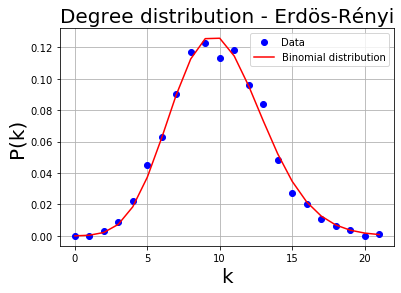

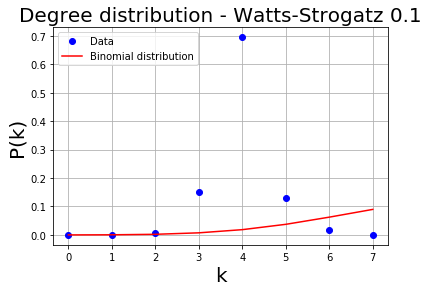

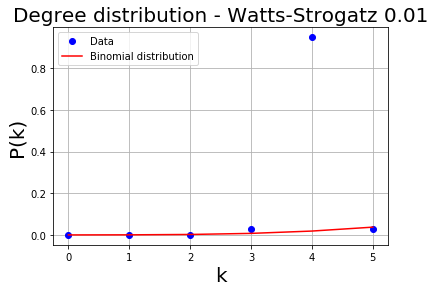

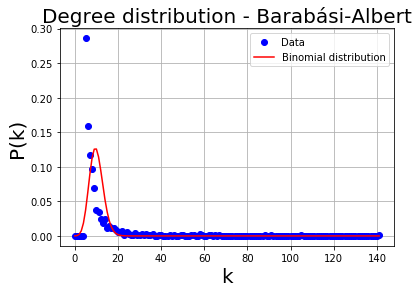

In [39]:
plot_degree_dist(nx.gnp_random_graph(nodes, p, seed=None, directed=False), p, "Erdös-Rényi")
plot_degree_dist(nx.watts_strogatz_graph(nodes, int(k), 0.1, seed=None), p, "Watts-Strogatz 0.1")
plot_degree_dist(nx.watts_strogatz_graph(nodes, int(k), 0.01, seed=None), p, "Watts-Strogatz 0.01")
plot_degree_dist(nx.barabasi_albert_graph(nodes, int(k)), p, "Barabási-Albert")

[Voltar para o topo](#lista)

## <a id="2">EX2</a>

In [80]:
def plot_phase():
    N = 100
    S = []
    vk = []
    for c in arange(0, 5, 0.05):
        p = c/(N-1)
        G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        G=Gcc[0]
        S.append(len(G)/N)
        vk.append(c)
        #print(c, len(G))
    plt.figure()
    plt.plot(vk,S,'b', label='Largest component size')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("S", fontsize=20)
    plt.title("Phase transition in random graphs", fontsize=20)
    plt.axvline(x=1, color = 'r')
    plt.grid(True)
    plt.show();

def plot_shortest_path():
    for k in [4, 10, 20, 30]:
        vd = []
        vn = []
        m = int(k/2)
        for n in arange(100, 1000, 100):
            G = nx.fast_gnp_random_graph(n, k/(n-1), seed=None, directed=False)
            vd.append(nx.average_shortest_path_length(max(nx.connected_component_subgraphs(G), key=len)))
            vn.append(n)
        plt.figure()
        plt.loglog(vn,vd,'-or',basex=10,basey=10, label='ER')
        x = arange(1, 1000, 100)
        plt.xlabel("N", fontsize=20)
        plt.ylabel("d", fontsize=20)
        plt.title("Average shortest path length - k=" + str(k), fontsize=20)
        plt.grid(True)
        plt.legend()
        plt.show();

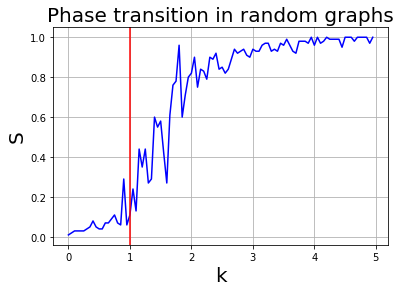

In [78]:
plot_phase()

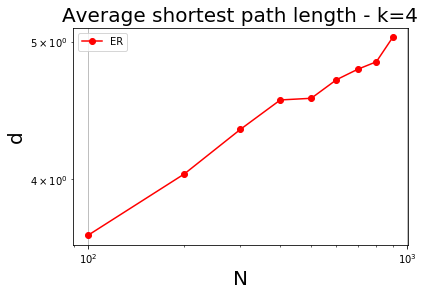

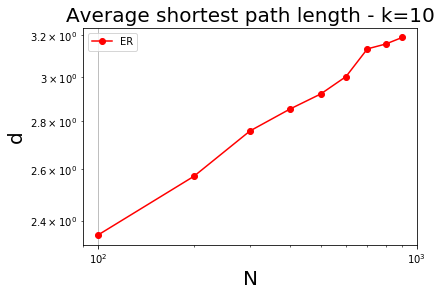

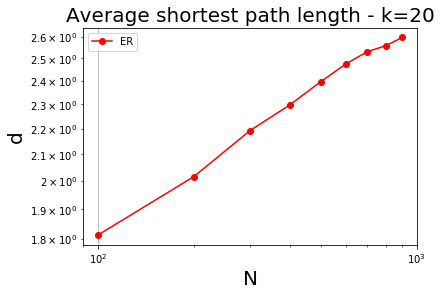

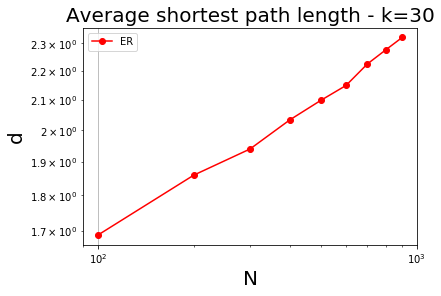

In [81]:
plot_shortest_path()

[Voltar para o topo](#lista)

## <a id="3">EX3</a>

In [2]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

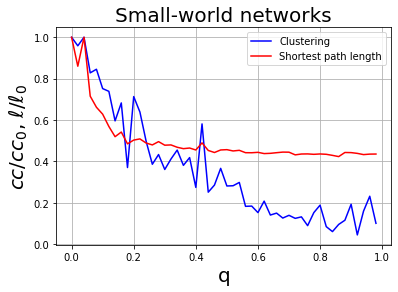

In [10]:
N = 50
av_degree = 8
k = int(av_degree/2)
vcc = []
vl = []
vq = []
vk = []
for q in np.arange(0, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=None)
    cc = nx.average_clustering(G)
    vcc.append(cc)
    l = nx.average_shortest_path_length(G)
    k2 = momment_of_degree_distribution(G,2)
    vk.append(k2)
    vl.append(l)
    vq.append(q)
plt.figure()
plt.plot(vq,np.array(vcc)/vcc[0],'b', label='Clustering')
plt.plot(vq,np.array(vl)/vl[0],'r', label='Shortest path length')
plt.xlabel("q", fontsize=20)
plt.ylabel("$cc/cc_0$, $\ell/\ell_0$", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

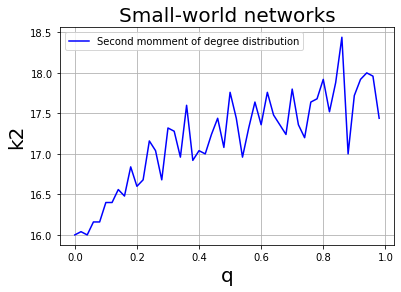

In [11]:
plt.figure()
plt.plot(vq,np.array(vk),'b', label='Second momment of degree distribution')
plt.xlabel("q", fontsize=20)
plt.ylabel("k2", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

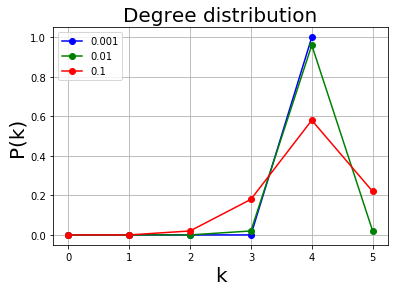

In [14]:
colors = ['b', 'g', 'r']
plt.figure()
aux = 0
for q in [0.001, 0.01, 0.1]: #q is the rewiring probability
    GWS = nx.watts_strogatz_graph(N, k, q, seed=None)
    ks, Pk = degree_distribution(GWS)
    plt.plot(ks,Pk,'o-', color = colors[aux], label = str(q))
    aux = aux + 1
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

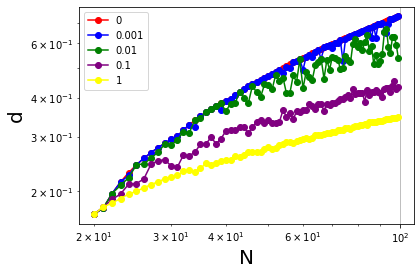

In [82]:
def plot_shortests_paths():
    c = ['r','b','g','purple','yellow']
    for k in [10]:
        count = 0
        for p in [0,0.001, 0.01, 0.1,1]:
            vd = []
            vn = []
            for N in range(20,100):
                G = nx.watts_strogatz_graph(N, k, p, seed=None)
                vd.append(log(nx.average_shortest_path_length(max(nx.connected_component_subgraphs(G), key=len)))/log(k))
                vn.append(N)
            plt.loglog(vn,vd,'-or',basex=10,basey=10, label=str(p), color=c[count])
            count += 1
    plt.xlabel("N", fontsize=20)
    plt.ylabel("d", fontsize=20)
    plt.grid(True)
    plt.legend()
    plt.show();
    
plot_shortests_paths()

[Voltar para o topo](#lista)

## <a id="4">EX4</a>

In [62]:
N = 100
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)
a = 2.5
seq = np.round(np.random.gamma(3, 1, N)).astype(int)
    
if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = np.random.randint(0, len(seq))
    seq[pos] = seq[pos]+ 1
    
GCM=nx.configuration_model(seq, create_using=nx.Graph())

In [61]:

table = {"N":[],
         "Average degree":[],
         "<k2>":[],
         "Average shortest path":[],
         "Average clustering coefficient":[],
         "Transitivity":[],
         "Assortativity coefficient":[]}

table["N"] = [len(GBA), len(GCM)]
table["Average degree"] = [(2*GBA.number_of_edges()/N), (2*GCM.number_of_edges()/N)]
table["<k2>"] = [momment_of_degree_distribution(GBA,2), momment_of_degree_distribution(GCM,2)] 
table["Average shortest path"] = [nx.average_shortest_path_length(max(nx.connected_component_subgraphs(GBA), key=len)), nx.average_shortest_path_length(max(nx.connected_component_subgraphs(GCM), key=len))] 
table["Average clustering coefficient"] = [nx.average_clustering(GBA), nx.average_clustering(GCM)]
table["Transitivity"] = [nx.transitivity(GBA), nx.transitivity(GCM)]
table["Assortativity coefficient"] = [nx.degree_assortativity_coefficient(GBA), nx.degree_assortativity_coefficient(GCM)]

displayer = pd.DataFrame(table, index=['Barabasis-Albert', 'Configuration Model'])
display(displayer)

,N,Average degree,<k2>,Average shortest path,Average clustering coefficient,Transitivity,Assortativity coefficient
Barabasis-Albert,100,7.68,90.16,2.370101,0.163013,0.120029,-0.126817
Configuration Model,100,2.96,11.64,4.229563,0.026222,0.034562,0.060904


In [ ]:
grafico vai ser bonus,.... o t é o n


falta ultima bolinha
O QUE EH ALPHA?????

In [80]:
N = 1000
graphs = []
alphas = [0.5, 1, 1.5, 2.5]
for a in alphas:    
    seq = np.round(np.random.gamma(a, 1, N)).astype(int)

    if(sum(seq)%2 != 0): # the sum of stubs have to be even
        pos = np.random.randint(0, len(seq))
        seq[pos] = seq[pos]+ 1

    GCM=nx.configuration_model(seq, create_using=nx.Graph())
    graphs.append(GCM)

table = {"N":[],
         "Average degree":[],
         "<k2>":[],
         "Average shortest path":[],
         "Average clustering coefficient":[],
         "Transitivity":[],
         "Assortativity coefficient":[]}

index = [] 
i = 0
for G in graphs:
    table["N"].append(len(G))
    table["Average degree"].append(2*G.number_of_edges()/N)
    table["<k2>"].append(momment_of_degree_distribution(G,2))
    table["Average shortest path"].append(nx.average_shortest_path_length(max(nx.connected_component_subgraphs(G), key=len)))
    table["Average clustering coefficient"].append(nx.average_clustering(G))
    table["Transitivity"].append(nx.transitivity(G))
    table["Assortativity coefficient"].append(nx.degree_assortativity_coefficient(G))
    index.append("CM(alpha = " + str(alphas[i]) + ")")
    i = i + 1
    
displayer = pd.DataFrame(table, index=index)
display(displayer)

,N,Average degree,<k2>,Average shortest path,Average clustering coefficient,Transitivity,Assortativity coefficient
CM(alpha = 0.5),1000,0.492,0.846,2.690909,0.000000,0.000000,-0.101694
CM(alpha = 1),1000,0.980,2.188,8.237431,0.000000,0.000000,0.007909
CM(alpha = 1.5),1000,1.472,3.582,12.830100,0.002167,0.002860,0.021121
CM(alpha = 2.5),1000,2.440,8.504,7.525443,0.000433,0.000997,0.019683


[Voltar para o topo](#lista)

## <a id="5">EX5</a>

In [66]:
er, ws, ba ja ta bom

pra rede real extrair N e <k>

gerar er, ws, ba

destas redes calcular medidas

medidas do ex 1

30 redes para cada
na ultima linha coloca a rede real

por fim plota a PCA



GBA 
GER
GWS


faz PCA

SyntaxError: invalid syntax (<ipython-input-66-591309c35e1c>, line 1)

[Voltar para o topo](#lista)